It is highly recommended to use a powerful **GPU**, you can use it for free uploading this notebook to [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).
<table align="center">
 <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ezponda/intro_deep_learning/blob/main/class/Fundamentals/First_Model.ipynb">
        <img src="https://colab.research.google.com/img/colab_favicon_256px.png"  width="50" height="50" style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/ezponda/intro_deep_learning/blob/main/class/Fundamentals/First_Model.ipynb">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png"  width="50" height="50" style="padding-bottom:5px;" />View Source on GitHub</a></td>
</table>

# First Neural Network

In [1]:
# Import required libraries
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data (veo que el valor mas alto es el 255 entonces lo divido por esto para que todos los valores me queden entre 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


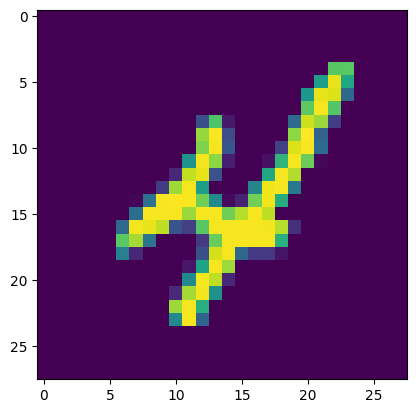

In [2]:
# Image example
plt.imshow(x_train[9])
plt.show()

In [ ]:
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Flatten the 28x28 input image into a 1D array of 784 values
    tf.keras.layers.Dense(128, activation='relu'), # Dense layer with 128 neurons and ReLU activation
    tf.keras.layers.Dropout(0.2), # Dropout layer for regularization to prevent overfitting
    tf.keras.layers.Dense(10, activation='softmax') # Output layer with 10 neurons (one for each class) and softmax activation
])

# Compile the model
model.compile(optimizer='adam', # Use the Adam optimizer
              loss='sparse_categorical_crossentropy', # Sparse categorical crossentropy loss for multi-class classification
              metrics=['accuracy']) # Track accuracy metric during training

# Train the model on the dataset
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the test loss and accuracy
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

In [ ]:
# Visualize the training history
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()